In [1]:
import speech_recognition as sr

In [2]:
import numpy as np

In [3]:
import spacy

In [4]:
import pandas as pd

In [5]:
from PIL import Image

In [6]:
import matplotlib.pyplot as plt

In [7]:
articles=pd.read_csv('articles.csv')

In [8]:
articles['price']=np.random.randint(3000,7000,articles.shape[0])

In [9]:
nlp1 = spacy.load(r"./output/model-best")

In [10]:
r=sr.Recognizer()

In [11]:
r.snowboy_wait_for_hot_word()

TypeError: snowboy_wait_for_hot_word() missing 3 required positional arguments: 'snowboy_location', 'snowboy_hot_word_files', and 'source'

In [ ]:
with sr.Microphone() as source:
    print('say something')
    audio=r.listen(source,timeout=6)
try:
    speech=r.recognize_google(audio)
except:
    pass;

In [ ]:
speech

In [ ]:
r.listen

say something
get me a shirt below 4000
{'product_type_name': 'shirt', 'pricing': 'below', 'price': '4000'}
        article_id  product_code                    prod_name  \
242      203595034        203595            Bryn Flanel Check   
243      203595036        203595            Bryn Flanel Check   
244      203595040        203595            Bryn Flanel Check   
245      203595048        203595            Bryn Flanel Check   
246      203595058        203595            Bryn Flanel Check   
...            ...           ...                          ...   
104952   929336001        929336  WILLOW RELAXED PQ ZIP SHIRT   
105145   933662001        933662        SPEED PRAWN PU BLOUSE   
105250   935635001        935635         LUCKY TIE NECK SHIRT   
105251   935635002        935635         LUCKY TIE NECK SHIRT   
105351   938182001        938182             Hemp  Price item   

        product_type_no product_type_name  product_group_name  \
242                 259             Shirt  Gar

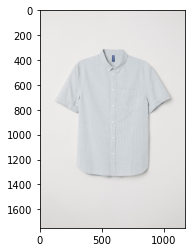

283236022


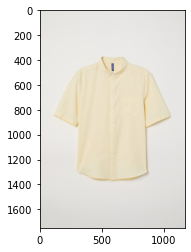

283236028


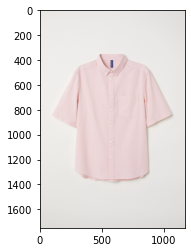

283236034


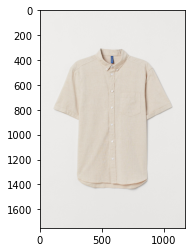

337777004


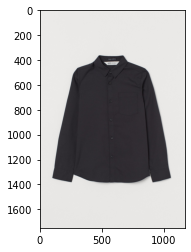

337777014


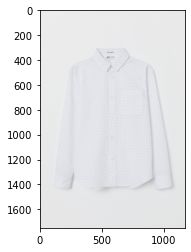

In [14]:
dictionary={}
with sr.Microphone() as source:
    print('say something')
    audio=r.listen(source,timeout=5)
try:
    speech=r.recognize_google(audio)
except:
    pass;
print(speech)
docs=nlp1(speech)
text=[]
labels=[]
for e in docs.ents:
    text.append(e.text)
    labels.append(e.label_)
dictionary=dict(zip(labels,text))
print(dictionary)
new_dict={}
for i,j in dictionary.items():
    if(i!=('pricing') and (i!= ('price'))):
        new_dict[i]=j.capitalize()
querry=articles.loc[(articles[list(new_dict)] == pd.Series(new_dict)).all(axis=1)]
print(querry)
for i,j in dictionary.items():
    if(i=='pricing'):
        if(j=='below'):
            querry1=querry[querry.price<int(dictionary['price'])]
        if(j=='above'):
            querry1=querry[querry.price>int(dictionary['price'])]
querry1.article_id.head()
ids=querry1.article_id.values[:6]
for x in ids:
    print(x)
    x=str(x)
    path=f"C:/Users/Convergytics/Desktop/H and M/HM Personal_Laptop/images/0{x[0:2]}/0{x}.jpg"
    pil_im = Image.open(path)
    plt.imshow(pil_im)
    plt.show()

In [ ]:
dictionary

In [ ]:
articles.product_type_name.unique()